In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [3]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


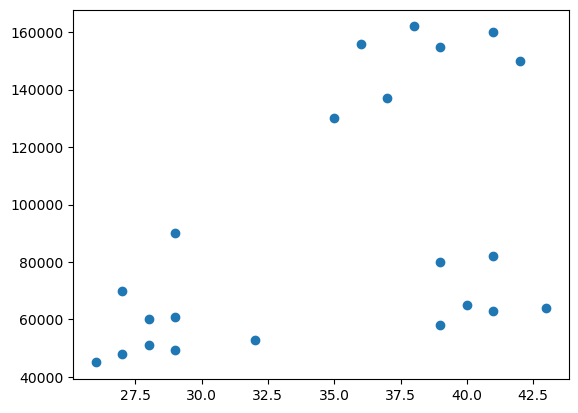

In [4]:
plt.scatter(df['Age'], df['Income($)'])

In [5]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [18]:
pip install threadpoolctl==3.1.0

  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
Note: you may need to restart the kernel to use updated packages.


Link to stackoverflow: https://stackoverflow.com/questions/71352354/sklearn-kmeans-is-not-working-as-i-only-get-nonetype-object-has-no-attribute

In [6]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [7]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


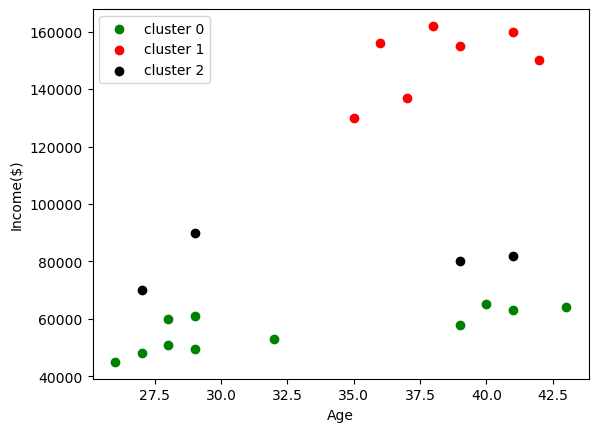

In [11]:
df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]
plt.scatter(df0['Age'], df0['Income($)'], color='green', label='cluster 0')
plt.scatter(df1['Age'], df1['Income($)'], color='red', label='cluster 1')
plt.scatter(df2['Age'], df2['Income($)'], color='black', label='cluster 2')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [15]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1


In [16]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [17]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [18]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


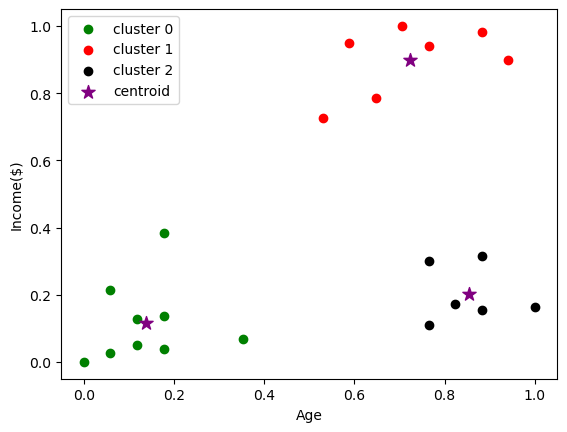

In [27]:
df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]
plt.scatter(df0['Age'], df0['Income($)'], color='green', label='cluster 0')
plt.scatter(df1['Age'], df1['Income($)'], color='red', label='cluster 1')
plt.scatter(df2['Age'], df2['Income($)'], color='black', label='cluster 2')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', s=100, color='purple', label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [20]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [28]:
sse_list = []
k_range = range(1, 10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse = km.inertia_
    sse_list.append(sse)
sse_list

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.2621792762345213,
 0.21578607765873023,
 0.1685851223602976,
 0.1397684499538816,
 0.10497488680620909]

Text(0, 0.5, 'SSE')

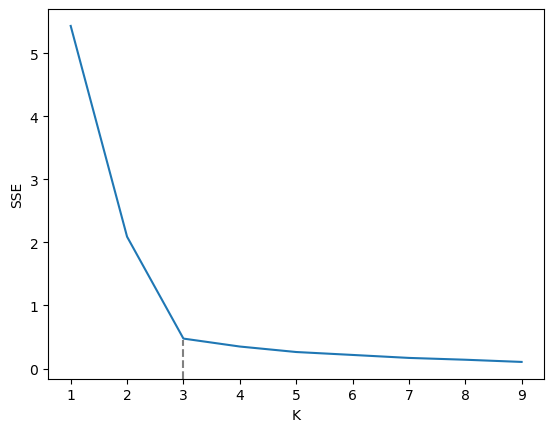

In [52]:
plt.plot(k_range, sse_list)
index_of_3 = k_range.index(3)
y_value = sse_list[index_of_3]
y_min = min(sse_list)
y_max = max(sse_list)
plt.axvline(x=3, ymin=0, ymax = (y_value - y_min) / (y_max - y_min) * 1.5, linestyle='--', color='grey')  # x1.5 - plug
plt.xlabel('K')
plt.ylabel('SSE')

### Homework

In [53]:
iris = datasets.load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [54]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [55]:
data.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1, inplace=True)
data.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Text(0, 0.5, 'Petal width')

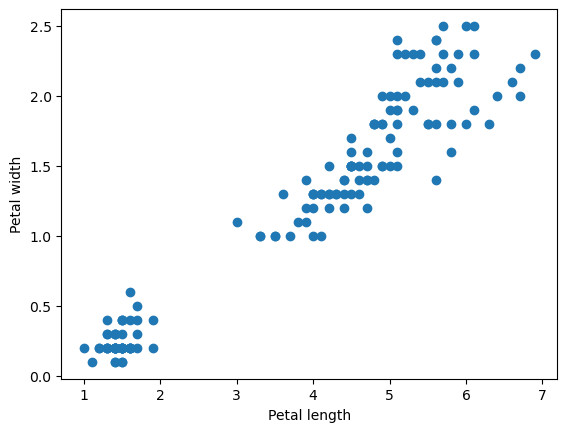

In [57]:
plt.scatter(data['petal length (cm)'], data['petal width (cm)'])
plt.xlabel('Petal length')
plt.ylabel('Petal width')

In [61]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(data[['petal length (cm)', 'petal width (cm)']])
data['clusters'] = y_predicted
data

,petal length (cm),petal width (cm),clusters
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


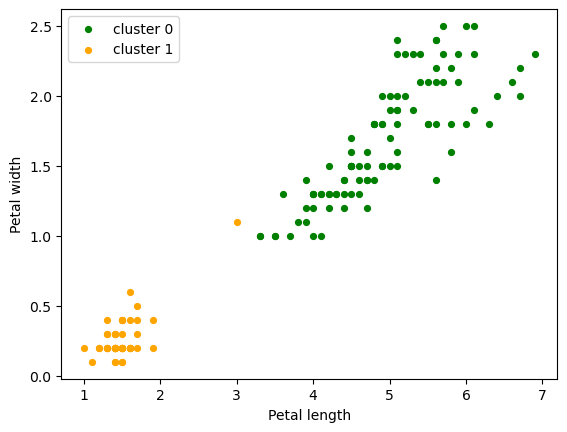

In [66]:
data0 = data[data['clusters']==0]
data1 = data[data['clusters']==1]
plt.scatter(data0['petal length (cm)'], data0['petal width (cm)'], label='cluster 0', marker='.', s=70, color='green')
plt.scatter(data1['petal length (cm)'], data1['petal width (cm)'], label='cluster 1', marker='.', s=70, color='orange')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend()

In [67]:
scaler = MinMaxScaler()

scaler.fit(data[['petal length (cm)']])
data['petal length (cm)'] = scaler.transform(data[['petal length (cm)']])

scaler.fit(data[['petal width (cm)']])
data['petal width (cm)'] = scaler.transform(data[['petal width (cm)']])
data.head()

,petal length (cm),petal width (cm),clusters
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [73]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(data[['petal length (cm)', 'petal width (cm)']])
data['clusters'] = y_predicted
data.head()

,petal length (cm),petal width (cm),clusters
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


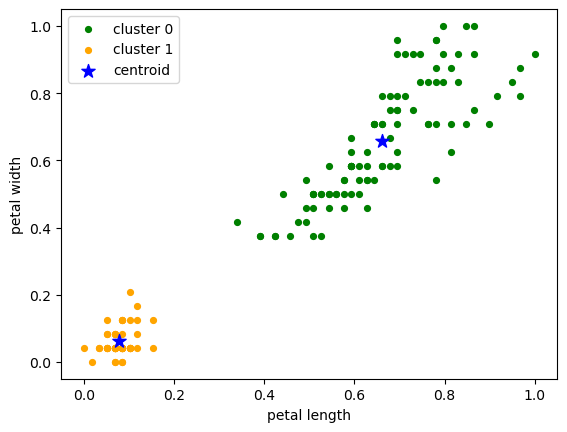

In [76]:
data0=data[data['clusters']==0]
data1=data[data['clusters']==1]
plt.scatter(data0['petal length (cm)'], data0['petal width (cm)'], label='cluster 0', marker='.', s=70, color='green')
plt.scatter(data1['petal length (cm)'], data1['petal width (cm)'], label='cluster 1', marker='.', s=70, color='orange')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], label='centroid', marker='*', s=100, color='blue')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()

In [79]:
sse_list = []
k_range = range(1, 10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(data[['petal length (cm)', 'petal width (cm)']])
    sse = km.inertia_
    sse_list.append(sse)
sse_list

[28.368353219727194,
 5.176463590044368,
 1.7018746881920963,
 1.1588792731667124,
 0.8538617353912238,
 0.6798101576314028,
 0.5651273455703979,
 0.486178934934251,
 0.4317489931666735]

Text(0, 0.5, 'SSE')

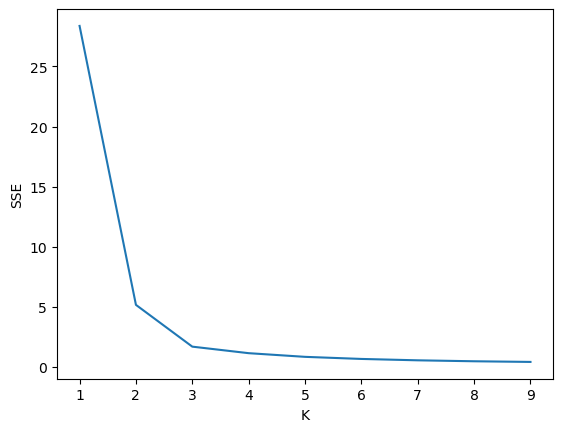

In [81]:
plt.plot(k_range, sse_list)
plt.xlabel('K')
plt.ylabel('SSE')